In [1]:
# colab 사용할 경우
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import os

In [3]:
os.getcwd()

'/content'

In [4]:
os.chdir("/content/drive/MyDrive/Colab/DSL CNN 과제")

In [5]:
os.getcwd()

'/content/drive/MyDrive/Colab/DSL CNN 과제'

# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [6]:
# python에서 파일 관리해주는 라이브러리
import os
import glob
import shutil

In [9]:
### Guideline for convenience ###
# 압축 풀기
!unzip -qq "animals10.zip"

In [10]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?
folder='/content/drive/MyDrive/Colab/DSL CNN 과제/Animals-10'
class_animals = os.listdir(folder)

In [11]:
class_animals

['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

In [12]:
for i in class_animals:
  jpeg = sorted(glob.glob('./Animals-10/{}/*.jpeg'.format(i)))
  jpg = sorted(glob.glob('./Animals-10/{}/*.jpg'.format(i)))
  png = sorted(glob.glob('./Animals-10/{}/*.png'.format(i)))
  print('{} jpeg :'.format(i), len(jpeg))
  print('{} jpg :'.format(i), len(jpg))
  print('{} png :'.format(i), len(png))

butterfly jpeg : 1650
butterfly jpg : 422
butterfly png : 40
cat jpeg : 1227
cat jpg : 440
cat png : 1
chicken jpeg : 3098
chicken jpg : 0
chicken png : 0
cow jpeg : 1866
cow jpg : 0
cow png : 0
dog jpeg : 4863
dog jpg : 0
dog png : 0
elephant jpeg : 1079
elephant jpg : 359
elephant png : 8
horse jpeg : 2623
horse jpg : 0
horse png : 0
sheep jpeg : 1444
sheep jpg : 376
sheep png : 0
spider jpeg : 4497
spider jpg : 322
spider png : 2
squirrel jpeg : 1862
squirrel jpg : 0
squirrel png : 0


In [13]:
# test에 넣을 이미지 개수 계산
for i in class_animals:
  jpeg = sorted(glob.glob('./Animals-10/{}/*.jpeg'.format(i)))
  jpeg_test_count = round(len(jpeg)*0.2)
  print('{} jpeg test num :'.format(i), jpeg_test_count)

butterfly jpeg test num : 330
cat jpeg test num : 245
chicken jpeg test num : 620
cow jpeg test num : 373
dog jpeg test num : 973
elephant jpeg test num : 216
horse jpeg test num : 525
sheep jpeg test num : 289
spider jpeg test num : 899
squirrel jpeg test num : 372


In [14]:
import random

def split(img_list, test_count, train_path, test_path):
  # img_list : 이미지 경로 리스트
  # test_count : test에 할당할 이미지 개수
  # train_path : train 데이터 넣을 경로
  # test_path : test 데이터 넣을 경로
  
  # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 고른 이미지를 train_path, test_path폴더에 폭사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [15]:
# train, test 폴더 경로 선언 & 만들기
for i in class_animals:
  train_path = './train/{}'.format(i)
  test_path = './test/{}'.format(i)
  os.makedirs(train_path, exist_ok=True)
  os.makedirs(test_path, exist_ok=True)

In [16]:
# train, test 폴더로 이미지 split해서 알맞게 집어넣기
for i in class_animals:
  jpeg = sorted(glob.glob('./Animals-10/{}/*.jpeg'.format(i)))
  jpeg_test_count = round(len(jpeg)*0.2)
  train_path = './train/{}'.format(i)
  test_path = './test/{}'.format(i)

  split(jpeg, jpeg_test_count, train_path, test_path)

train 폴더 이미지 개수 : 1320
test 폴더 이미지 개수 : 330
train 폴더 이미지 개수 : 982
test 폴더 이미지 개수 : 245
train 폴더 이미지 개수 : 2478
test 폴더 이미지 개수 : 620
train 폴더 이미지 개수 : 1493
test 폴더 이미지 개수 : 373
train 폴더 이미지 개수 : 3890
test 폴더 이미지 개수 : 973
train 폴더 이미지 개수 : 863
test 폴더 이미지 개수 : 216
train 폴더 이미지 개수 : 2098
test 폴더 이미지 개수 : 525
train 폴더 이미지 개수 : 1155
test 폴더 이미지 개수 : 289
train 폴더 이미지 개수 : 3598
test 폴더 이미지 개수 : 899
train 폴더 이미지 개수 : 1490
test 폴더 이미지 개수 : 372


In [17]:
for i in class_animals:
    print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob('./train/{}/*'.format(i))),len(glob.glob('./test/{}/*'.format(i)))))

train 폴더 이미지 개수 : 1320
test 폴더 이미지 개수 : 330
train 폴더 이미지 개수 : 982
test 폴더 이미지 개수 : 245
train 폴더 이미지 개수 : 2478
test 폴더 이미지 개수 : 620
train 폴더 이미지 개수 : 1493
test 폴더 이미지 개수 : 373
train 폴더 이미지 개수 : 3890
test 폴더 이미지 개수 : 973
train 폴더 이미지 개수 : 863
test 폴더 이미지 개수 : 216
train 폴더 이미지 개수 : 2098
test 폴더 이미지 개수 : 525
train 폴더 이미지 개수 : 1155
test 폴더 이미지 개수 : 289
train 폴더 이미지 개수 : 3598
test 폴더 이미지 개수 : 899
train 폴더 이미지 개수 : 1490
test 폴더 이미지 개수 : 372


In [18]:
# 잘 들어갔는지 확인

# train
for i in class_animals:
  print(glob.glob('./train/{}/*'.format(i))[-5:]) # jpg,jpeg만.. png는...

# test
print('-'*100, '\n')
for each_class in class_animals:
  print(glob.glob('./test/{}/*'.format(i))[-5:])

['./train/butterfly/butterfly (994).jpeg', './train/butterfly/butterfly (996).jpeg', './train/butterfly/butterfly (997).jpeg', './train/butterfly/butterfly (998).jpeg', './train/butterfly/butterfly (999).jpeg']
['./train/cat/cat (991).jpeg', './train/cat/cat (993).jpeg', './train/cat/cat (994).jpeg', './train/cat/cat (996).jpeg', './train/cat/cat (998).jpeg']
['./train/chicken/chicken (994).jpeg', './train/chicken/chicken (995).jpeg', './train/chicken/chicken (996).jpeg', './train/chicken/chicken (997).jpeg', './train/chicken/chicken (999).jpeg']
['./train/cow/cow (995).jpeg', './train/cow/cow (996).jpeg', './train/cow/cow (997).jpeg', './train/cow/cow (998).jpeg', './train/cow/cow (999).jpeg']
['./train/dog/dog (994).jpeg', './train/dog/dog (995).jpeg', './train/dog/dog (996).jpeg', './train/dog/dog (997).jpeg', './train/dog/dog (999).jpeg']
['./train/elephant/elephant (995).jpeg', './train/elephant/elephant (996).jpeg', './train/elephant/elephant (997).jpeg', './train/elephant/elepha

# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [19]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms

## Augmentation 고민

In [21]:
for i in class_animals:
  img_list = os.listdir('./train/{}'.format(i))
  img_list = img_list[:10]
  for j in img_list:
    img_path = './train/{}/{}'.format(i, j)
    img = Image.open(img_path)
    img_np = np.array(img)
    print(img_np.shape)

(225, 300, 3)
(225, 300, 3)
(225, 300, 3)
(300, 223, 3)
(208, 300, 3)
(255, 300, 3)
(300, 198, 3)
(228, 300, 3)
(300, 300, 3)
(244, 300, 3)
(199, 300, 3)
(300, 270, 3)
(200, 300, 3)
(188, 300, 3)
(169, 300, 3)
(300, 251, 3)
(225, 300, 3)
(200, 300, 3)
(271, 300, 3)
(300, 300, 3)
(300, 182, 3)
(261, 300, 3)
(240, 300, 3)
(200, 300, 3)
(225, 300, 3)
(300, 213, 3)
(300, 225, 3)
(169, 300, 3)
(225, 300, 3)
(200, 300, 3)
(200, 300, 3)
(200, 300, 3)
(225, 300, 3)
(225, 300, 3)
(214, 300, 3)
(214, 300, 3)
(199, 300, 3)
(180, 300, 3)
(225, 300, 3)
(225, 300, 3)
(225, 300, 3)
(300, 225, 3)
(256, 300, 3)
(254, 300, 3)
(225, 300, 3)
(225, 300, 3)
(195, 300, 3)
(169, 300, 3)
(199, 300, 3)
(210, 300, 3)
(225, 300, 3)
(196, 300, 3)
(199, 300, 3)
(200, 300, 3)
(224, 300, 3)
(300, 199, 3)
(225, 300, 3)
(200, 266, 3)
(200, 300, 3)
(200, 300, 3)
(225, 300, 3)
(300, 287, 3)
(257, 300, 3)
(240, 300, 3)
(300, 237, 3)
(169, 300, 3)
(200, 300, 3)
(190, 300, 3)
(232, 300, 3)
(300, 283, 3)
(200, 300, 3)
(225, 

In [22]:
for i in class_animals:
  img_list = os.listdir('./test/{}'.format(i))
  img_list = img_list[:10]
  for j in img_list:
    img_path = './test/{}/{}'.format(i, j)
    img = Image.open(img_path)
    img_np = np.array(img)
    print(img_np.shape)

(204, 300, 3)
(240, 300, 3)
(300, 300, 3)
(300, 241, 3)
(213, 300, 3)
(169, 300, 3)
(225, 300, 3)
(249, 300, 3)
(295, 300, 3)
(188, 300, 3)
(300, 300, 3)
(169, 300, 3)
(169, 300, 3)
(273, 300, 3)
(207, 300, 3)
(300, 297, 3)
(232, 300, 3)
(211, 300, 3)
(200, 300, 3)
(169, 300, 3)
(200, 300, 3)
(300, 300, 3)
(261, 300, 3)
(300, 300, 3)
(300, 300, 3)
(225, 300, 3)
(300, 282, 3)
(281, 300, 3)
(247, 300, 3)
(225, 300, 3)
(225, 300, 3)
(193, 300, 3)
(230, 300, 3)
(169, 300, 3)
(208, 300, 3)
(169, 300, 3)
(200, 300, 3)
(200, 300, 3)
(225, 300, 3)
(228, 300, 3)
(300, 300, 3)
(225, 300, 3)
(300, 225, 3)
(300, 194, 3)
(249, 300, 3)
(200, 300, 3)
(300, 225, 3)
(225, 300, 3)
(225, 300, 3)
(300, 225, 3)
(225, 300, 3)
(149, 300, 3)
(300, 299, 3)
(225, 300, 3)
(206, 300, 3)
(224, 300, 3)
(250, 300, 3)
(225, 300, 3)
(201, 300, 3)
(300, 201, 3)
(210, 300, 3)
(169, 300, 3)
(210, 300, 3)
(240, 300, 3)
(300, 222, 3)
(210, 300, 3)
(200, 300, 3)
(160, 284, 3)
(225, 300, 3)
(189, 300, 3)
(225, 300, 3)
(218, 

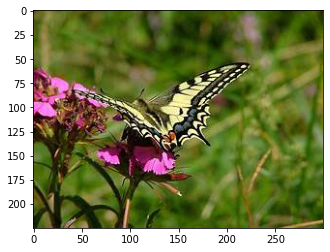

In [29]:
img_path1 = './train/butterfly/butterfly (997).jpeg'
img1 = Image.open(img_path1)
imshow(img1)

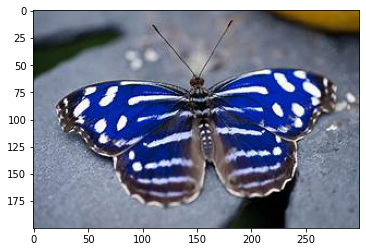

In [31]:
img_path2 = './train/butterfly/butterfly (999).jpeg'
img2 = Image.open(img_path2)
imshow(img2)

In [32]:
try_transform1 = transforms.Compose([
    transforms.Resize(224)
])

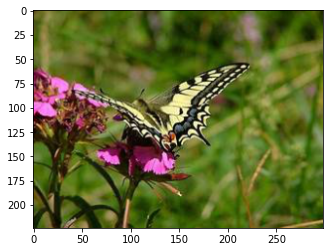

In [33]:
imshow(try_transform1(img1))

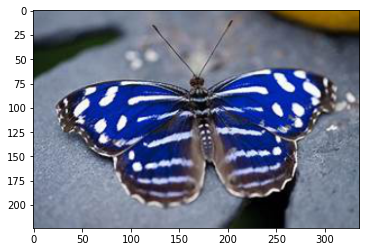

In [34]:
imshow(try_transform1(img2))

In [35]:
try_transform2 = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224)
])

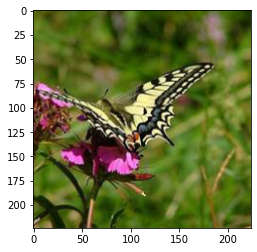

In [36]:
imshow(try_transform2(img1))

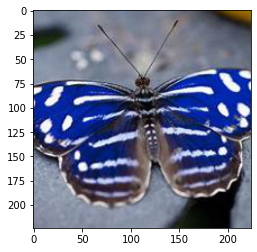

In [37]:
imshow(try_transform2(img2))

In [38]:
try_transform3 = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(0.5)
])

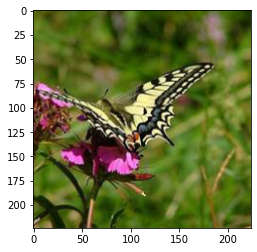

In [39]:
imshow(try_transform3(img1))

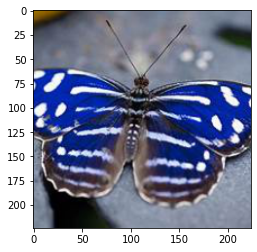

In [40]:
imshow(try_transform3(img2))

## Dataset 불러오기

In [41]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!
transform_train = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [42]:
transform_test = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [43]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언
train_data = torchvision.datasets.ImageFolder(
    root = './train',
    transform = transform_train
)
test_data = torchvision.datasets.ImageFolder(
    root = './test',
    transform = transform_test
)

In [44]:
len(train_data)

19367

In [45]:
len(test_data)

4842

In [46]:
train_data[0]

(tensor([[[1.1872, 1.2043, 1.2043,  ..., 1.6495, 1.6324, 1.6153],
          [1.1358, 1.1358, 1.1358,  ..., 1.6495, 1.6495, 1.6324],
          [1.0673, 1.0673, 1.0502,  ..., 1.5639, 1.5639, 1.5639],
          ...,
          [1.0502, 1.0673, 1.0673,  ..., 1.3584, 1.3413, 1.3413],
          [1.0502, 1.0673, 1.0673,  ..., 1.3584, 1.3413, 1.3413],
          [1.1700, 1.1700, 1.1529,  ..., 1.4612, 1.4269, 1.4440]],
 
         [[1.2206, 1.2381, 1.2381,  ..., 1.6583, 1.6408, 1.6232],
          [1.1681, 1.1681, 1.1681,  ..., 1.6758, 1.6758, 1.6583],
          [1.0980, 1.0980, 1.0805,  ..., 1.6232, 1.6232, 1.6232],
          ...,
          [1.0980, 1.1155, 1.1155,  ..., 1.4132, 1.3957, 1.3957],
          [1.0980, 1.1155, 1.1155,  ..., 1.4132, 1.3957, 1.3957],
          [1.2206, 1.2206, 1.2031,  ..., 1.5182, 1.4832, 1.4832]],
 
         [[1.2980, 1.3154, 1.3154,  ..., 1.7163, 1.6988, 1.6814],
          [1.2457, 1.2457, 1.2457,  ..., 1.6988, 1.6988, 1.6814],
          [1.1759, 1.1759, 1.1585,  ...,

In [47]:
train_data[0][0].shape

torch.Size([3, 224, 224])

In [48]:
train_data[0][1]

0

In [49]:
train_data[19222][1]

9

## DataLoader 정의

In [50]:
# train, test에 대해 DataLoader 정의
trainloader = torch.utils.data.DataLoader(
    train_data,
    batch_size = 32,
    shuffle=True,
    num_workers=2
)

In [51]:
testloader = torch.utils.data.DataLoader(
    test_data,
    batch_size = 32,
    shuffle=False,
    num_workers=2
)

In [52]:
# 19367/32 = 605
print(len(trainloader))

# 4842/32 = 151
print(len(testloader))

606
152


In [53]:
# dataloader의 iteration 하나만 가져와서 확인해보자
tmploader = torch.utils.data.DataLoader(test_data, batch_size = 4, shuffle=False)
dataiter = iter(tmploader)
images, labels = dataiter.next()

In [54]:
images.shape

torch.Size([4, 3, 224, 224])

In [55]:
labels.shape

torch.Size([4])

In [56]:
# test dataloader의 첫 batch 확인
def imshow_loader(img):
    img = img * 0.225 + 0.456 # 정확한 값은 아니지만 대강 normalize 반대로
    img_np = np.array(img)
    imshow(np.transpose(img_np, (1,2,0)))
    plt.show()

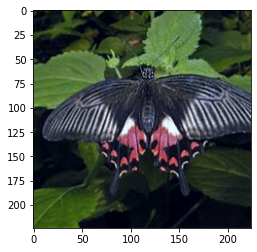

In [57]:
imshow_loader(train_data[1][0])

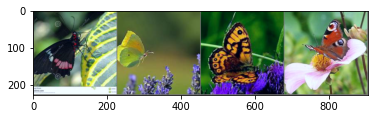

butterfly butterfly butterfly butterfly


In [58]:
imshow_loader(torchvision.utils.make_grid(images))
print(' '.join(f'{class_animals[labels[j]]:5s}' for j in range(4)))

In [ ]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        ##### Layer 정의 #####
        self.layer = nn.Sequential(
            # 맨처음 RGB 채널 3개이므로 가장 처음 in_channels = 3
            # img의 가장 첫 차원이 batch_size 값은 계속해서 유지
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=25), # [batch_size,3,224,224] -> [batch_size,16,200,200]
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=25), # [batch_size,16,200,200] -> [batch_size,32,176,176]
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size,32,176,176] -> [batch_size,32,88,88]
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=15), # [batch_size,32,88,88] -> [batch_size,32,74,74]
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size,32,74,74] -> [batch_size,32,37,37]
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=10), # [batch_size,32,37,37] -> [batch_size,32,28,28]
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size,32,28,28] -> [batch_size,32,14,14]
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5), # [batch_size,32,14,14] -> [batch_size,32,10,10]
            nn.ReLU()
        )

        self.fc_layer = nn.Sequential(
            nn.Linear(32*10*10,100), # [batch_size,32*10*10] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self, x):
        # forward pass 과정
        out = self.layer(x)
        out = out.view(out.size(0),-1)  # FC layer에 들어가기전, flatten! - view 함수 활용
                                        # 가장 첫 차원인 batch_size는 유지하고 나머지 차원들을 하나로 합치기 - [batch_size,32,10,10] -> [batch_size,32*10*10]
        out = self.fc_layer(out)
        return out

In [ ]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 모델 구조 파악할 수 있는 torchsummary의 summary 함수
# 전체적인 구조, param 개수, 용량 등 확인할 수 있음
# 이게 잘나와야 CNN 모델 차원 알맞게 정의한것 - 차원 맞지 않다면 여기서 에러뜸

from torchsummary import summary
test_model = MyModel() # 모델 객체 선언
summary(test_model.cuda(), (3,224,224), batch_size=32) # Recall) Tensor는 C, H, W 순서로 이미지 가짐

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 16, 200, 200]          30,016
              ReLU-2         [32, 16, 200, 200]               0
            Conv2d-3         [32, 32, 176, 176]         320,032
              ReLU-4         [32, 32, 176, 176]               0
           Dropout-5         [32, 32, 176, 176]               0
         MaxPool2d-6           [32, 32, 88, 88]               0
            Conv2d-7           [32, 32, 74, 74]         230,432
              ReLU-8           [32, 32, 74, 74]               0
           Dropout-9           [32, 32, 74, 74]               0
        MaxPool2d-10           [32, 32, 37, 37]               0
           Conv2d-11           [32, 32, 28, 28]         102,432
             ReLU-12           [32, 32, 28, 28]               0
          Dropout-13           [32, 32, 28, 28]               0
        MaxPool2d-14           [32, 32,

In [ ]:
# Device 선언 (GPU 권장)
# 아래 코드가 보통 device 할당하는 방식
# colab일 경우, 무거운 모델을 돌린다면 런타임 -> 런타임 유형 변경 -> GPU 로 설정하고 돌리는걸 강추
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
# 모델 객체 선언
# to(device) : 모델을 device 위에서 돌릴거임
mymodel = MyModel().to(device)
mymodel

MyModel(
  (layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(25, 25), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(25, 25), stride=(1, 1))
    (3): ReLU()
    (4): Dropout(p=0.2, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 32, kernel_size=(15, 15), stride=(1, 1))
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(32, 32, kernel_size=(10, 10), stride=(1, 1))
    (11): ReLU()
    (12): Dropout(p=0.2, inplace=False)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
    (15): ReLU()
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=3200, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [ ]:
# loss func, optimizer 정의
criterion = nn.CrossEntropyLoss().to(device) # criterion (loss func)도 device 위에서
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001, weight_decay=0.0001) # 보통 Adam의 learning rate로 0.001 사용
                                                                                  # weight_decay = L2 Regularization의 lambda값 (가중치 제한 정도)

In [ ]:
# train 함수 정의
with torch.no_grad():
    for i, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        print(inputs.shape)  # batch_size개의 이미지
        print(targets.shape) # batch_size개의 클래스

        outputs = mymodel(inputs)
        print(outputs.shape) # outputs는 32, 10 차원 (32개 data의 확률 10개씩)
        print(targets.shape) # targets는 32차원 (32개 data의 실제 클래스)

        loss = criterion(outputs, targets)  # -> cross entropy 식에 넣을때 이런 형태로 넣으면됨 (outputs, targets의 차원을 맞출 필요가 없음)
        print(loss.item())

        print(outputs.max(1)[1]) # 예측한 클래스
        print(targets) # 실제 클래스
        correct = (outputs.max(1)[1] == targets).sum().item() # 맞게 예측한 클래스 개수
        print(correct)
        break

torch.Size([32, 3, 224, 224])
torch.Size([32])
torch.Size([32, 10])
torch.Size([32])
2.295546054840088
tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8], device='cuda:0')
tensor([6, 8, 3, 4, 7, 4, 1, 0, 9, 2, 8, 7, 7, 3, 3, 5, 7, 4, 8, 4, 4, 7, 8, 6,
        9, 0, 1, 4, 4, 1, 2, 0], device='cuda:0')
4


In [ ]:
# 추후 시각화를 위해 매 epoch마다 loss, accuracy 값을 저장할 리스트
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [ ]:
def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 300 == 299:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 300 batches: {running_loss / 300}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [ ]:
# test 함수 정의
def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

In [ ]:
# training
num_epoch = 30

for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)

# model 저장! - parameter값 저장
torch.save(mymodel.state_dict(), './mymodel_cifar10.pt')
print('Model Saved!')


[ Train epoch: 1 ]

Current batch: 300
Average train loss of recent 300 batches: 2.208256849050522

Current batch: 600
Average train loss of recent 300 batches: 2.301326992511749

Total train accuarcy: 19.331853152269325
Total train loss: 2.253908860998185

[ Test epoch: 1 ]

Test accuarcy: 20.09500206526229
Test average loss: 2.191572374419162

[ Train epoch: 2 ]

Current batch: 300
Average train loss of recent 300 batches: 2.178442167043686

Current batch: 600
Average train loss of recent 300 batches: 2.1778900714715324

Total train accuarcy: 19.920483296328808
Total train loss: 2.1781893217130857

[ Test epoch: 2 ]

Test accuarcy: 20.09500206526229
Test average loss: 2.1782552882244715

[ Train epoch: 3 ]

Current batch: 300
Average train loss of recent 300 batches: 2.173892910083135

Current batch: 600
Average train loss of recent 300 batches: 2.1808067544301353

Total train accuarcy: 19.77590747147209
Total train loss: 2.1769344198821794

[ Test epoch: 3 ]

Test accuarcy: 20.0950

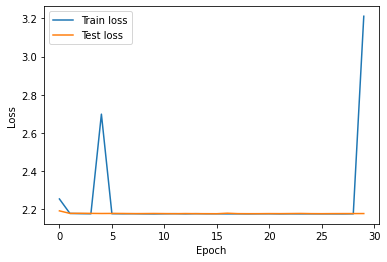

In [ ]:
# loss, accuracy 추이 확인 with plt.plot
plt.plot(range(num_epoch), seq_train_loss, label="Train loss")
plt.plot(range(num_epoch), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

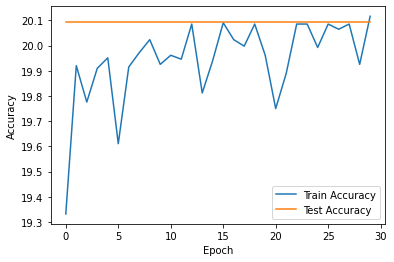

In [ ]:
plt.plot(range(num_epoch), seq_train_acc, label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## Model 클래스 정의 & 확인

In [62]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        ##### Layer 정의 #####
        self.layer = nn.Sequential(
            # 맨처음 RGB 채널 3개이므로 가장 처음 in_channels = 3
            # img의 가장 첫 차원이 batch_size 값은 계속해서 유지
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5), # [batch_size,3,224,224] -> [batch_size,16,220,220]
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5), # [batch_size,16,220,220] -> [batch_size,32,216,216]
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size,32,216,216] -> [batch_size,32,108,108]
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5), # [batch_size,32,104,104] -> [batch_size,32,100,100]
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size,32,100,100] -> [batch_size,32,50,50]
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3), # [batch_size,32,50,50] -> [batch_size,32,48,48]
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size,32,48,48] -> [batch_size,32,24,24]
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3), # [batch_size,32,24,24] -> [batch_size,32,22,22]
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size,32,22,22] -> [batch_size,32,11,11]
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3), # [batch_size,32,11,11] -> [batch_size,32,9,9]
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3), # [batch_size,32,9,9] -> [batch_size,32,7,7]
            nn.ReLU()
        )

        self.fc_layer = nn.Sequential(
            nn.Linear(32*7*7,100), # [batch_size,32*7*7] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self, x):
        # forward pass 과정
        out = self.layer(x)
        out = out.view(out.size(0),-1)  # FC layer에 들어가기전, flatten! - view 함수 활용
                                        # 가장 첫 차원인 batch_size는 유지하고 나머지 차원들을 하나로 합치기 - [batch_size,32,10,10] -> [batch_size,32*10*10]
        out = self.fc_layer(out)
        return out

In [60]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
# 모델 구조 파악할 수 있는 torchsummary의 summary 함수
# 전체적인 구조, param 개수, 용량 등 확인할 수 있음
# 이게 잘나와야 CNN 모델 차원 알맞게 정의한것 - 차원 맞지 않다면 여기서 에러뜸

from torchsummary import summary
test_model = MyModel() # 모델 객체 선언
summary(test_model.cuda(), (3,224,224), batch_size=32) # Recall) Tensor는 C, H, W 순서로 이미지 가짐

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 16, 220, 220]           1,216
              ReLU-2         [32, 16, 220, 220]               0
            Conv2d-3         [32, 32, 216, 216]          12,832
              ReLU-4         [32, 32, 216, 216]               0
           Dropout-5         [32, 32, 216, 216]               0
         MaxPool2d-6         [32, 32, 108, 108]               0
            Conv2d-7         [32, 32, 104, 104]          25,632
              ReLU-8         [32, 32, 104, 104]               0
           Dropout-9         [32, 32, 104, 104]               0
        MaxPool2d-10           [32, 32, 52, 52]               0
           Conv2d-11           [32, 32, 50, 50]           9,248
             ReLU-12           [32, 32, 50, 50]               0
          Dropout-13           [32, 32, 50, 50]               0
        MaxPool2d-14           [32, 32,

In [64]:
# Device 선언 (GPU 권장)
# 아래 코드가 보통 device 할당하는 방식
# colab일 경우, 무거운 모델을 돌린다면 런타임 -> 런타임 유형 변경 -> GPU 로 설정하고 돌리는걸 강추
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [65]:
# 모델 객체 선언
# to(device) : 모델을 device 위에서 돌릴거임
mymodel = MyModel().to(device)
mymodel

MyModel(
  (layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU()
    (4): Dropout(p=0.2, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU()
    (12): Dropout(p=0.2, inplace=False)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (15): ReLU()
    (16): Dropout(p=0.2, inplace=False)
    (17): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (18): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (19): ReLU()
    (20): Dropout

In [66]:
# loss func, optimizer 정의
criterion = nn.CrossEntropyLoss().to(device) # criterion (loss func)도 device 위에서
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001, weight_decay=0.0001) # 보통 Adam의 learning rate로 0.001 사용
                                                                                  # weight_decay = L2 Regularization의 lambda값 (가중치 제한 정도)

In [67]:
# train 함수 정의
with torch.no_grad():
    for i, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        print(inputs.shape)  # batch_size개의 이미지
        print(targets.shape) # batch_size개의 클래스

        outputs = mymodel(inputs)
        print(outputs.shape) # outputs는 32, 10 차원 (32개 data의 확률 10개씩)
        print(targets.shape) # targets는 32차원 (32개 data의 실제 클래스)

        loss = criterion(outputs, targets)  # -> cross entropy 식에 넣을때 이런 형태로 넣으면됨 (outputs, targets의 차원을 맞출 필요가 없음)
        print(loss.item())

        print(outputs.max(1)[1]) # 예측한 클래스
        print(targets) # 실제 클래스
        correct = (outputs.max(1)[1] == targets).sum().item() # 맞게 예측한 클래스 개수
        print(correct)
        break

torch.Size([32, 3, 224, 224])
torch.Size([32])
torch.Size([32, 10])
torch.Size([32])
2.2868669033050537
tensor([2, 2, 2, 2, 6, 2, 6, 2, 2, 2, 2, 2, 6, 6, 6, 6, 2, 6, 2, 6, 6, 6, 2, 6,
        2, 6, 6, 6, 6, 2, 2, 6], device='cuda:0')
tensor([1, 4, 3, 7, 2, 3, 4, 6, 3, 6, 3, 8, 8, 7, 8, 6, 6, 8, 9, 2, 8, 2, 2, 6,
        1, 6, 2, 4, 4, 8, 4, 1], device='cuda:0')
4


In [68]:
# 추후 시각화를 위해 매 epoch마다 loss, accuracy 값을 저장할 리스트
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [69]:
def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 300 == 299:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 300 batches: {running_loss / 300}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [70]:
# test 함수 정의
def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

In [71]:
# training
num_epoch = 30

for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)

# model 저장! - parameter값 저장
torch.save(mymodel.state_dict(), './mymodel_cifar10.pt')
print('Model Saved!')


[ Train epoch: 1 ]

Current batch: 300
Average train loss of recent 300 batches: 2.1754003675778706

Current batch: 600
Average train loss of recent 300 batches: 2.0406426099936166

Total train accuarcy: 24.583053647957865
Total train loss: 2.1069787835130596

[ Test epoch: 1 ]

Test accuarcy: 29.59520859149112
Test average loss: 1.994516913828097

[ Train epoch: 2 ]

Current batch: 300
Average train loss of recent 300 batches: 1.897764927148819

Current batch: 600
Average train loss of recent 300 batches: 1.71437890291214

Total train accuarcy: 36.871998760778645
Total train loss: 1.8033490596037887

[ Test epoch: 2 ]

Test accuarcy: 35.50185873605948
Test average loss: 1.8513865612055127

[ Train epoch: 3 ]

Current batch: 300
Average train loss of recent 300 batches: 1.603839248418808

Current batch: 600
Average train loss of recent 300 batches: 1.516072438955307

Total train accuarcy: 45.64465327619146
Total train loss: 1.5576236427027006

[ Test epoch: 3 ]

Test accuarcy: 41.7596

KeyboardInterrupt: ignored

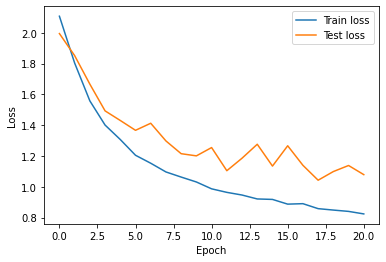

In [74]:
# loss, accuracy 추이 확인 with plt.plot
plt.plot(range(21), seq_train_loss, label="Train loss")
plt.plot(range(21), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

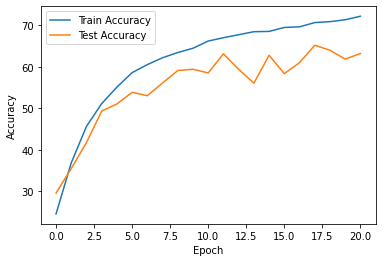

In [75]:
plt.plot(range(21), seq_train_acc, label="Train Accuracy")
plt.plot(range(21), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

GPU 문제로 30 epoch을 모두 돌리지 못하고 21 epoch까지만 돌리게 되었습니다.

하지만 loss도 수렴하고 있고, Accuracy도 상승하고 있기 때문에 epoch 수는 적절했던 것 같습니다.

그러나 test data 기준 Accuracy는 목표치에 미치지 못하고, test data의 loss 및 accuracy가 불안정하게 수렴하고 있는 것을 보아 모델에 대해 추가적인 수정이 필요할 것 같습니다.

batchnorm 이용하거나 데이터셋의 불균형 문제를 해결하는 등의 방법으로 모델의 성능을 향상시켜볼 예정입니다.